In [1]:
X = np.arange(10).reshape((5,2))
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [3]:
Y = np.arange(5)
Y

array([0, 1, 2, 3, 4])

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state=42)


In [5]:
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [6]:
Y_train

array([2, 0, 3])

In [7]:
X_test

array([[2, 3],
       [8, 9]])

In [8]:
Y_test

array([1, 4])

In [11]:
N = 5
X = np.arange(8 * N).reshape(-1,2) * 10
Y = np.hstack([np.ones(N), np.ones(N) * 2, np.ones(N) * 3, np.ones(N) * 4])
print("X:\n", X, sep="")
print("Y:\n", Y, sep="")

X:
[[  0  10]
 [ 20  30]
 [ 40  50]
 [ 60  70]
 [ 80  90]
 [100 110]
 [120 130]
 [140 150]
 [160 170]
 [180 190]
 [200 210]
 [220 230]
 [240 250]
 [260 270]
 [280 290]
 [300 310]
 [320 330]
 [340 350]
 [360 370]
 [380 390]]
Y:
[ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.]


In [33]:
from sklearn.cross_validation import KFold
cv = KFold(len(X), n_folds = 3, shuffle=True, random_state = 1)
for train_index, test_index in cv:
    print("test y:", Y[test_index])
    print("." * 80)
    print("train y: ", Y[train_index])
    print("=" * 80)

test y: [ 1.  1.  1.  2.  3.  3.  4.]
................................................................................
train y:  [ 1.  1.  2.  2.  2.  2.  3.  3.  3.  4.  4.  4.  4.]
test y: [ 1.  1.  2.  3.  4.  4.  4.]
................................................................................
train y:  [ 1.  1.  1.  2.  2.  2.  2.  3.  3.  3.  3.  4.  4.]
test y: [ 2.  2.  2.  3.  3.  4.]
................................................................................
train y:  [ 1.  1.  1.  1.  1.  2.  2.  3.  3.  3.  4.  4.  4.  4.]


In [32]:
for t, tt in cv:
    print(t, tt)

[ 0  1  2  3  4  5  7  8  9 10 12 14 15] [ 6 11 13 16 17 18 19]
[ 0  3  6  7  8 10 11 13 15 16 17 18 19] [ 1  2  4  5  9 12 14]
[ 1  2  4  5  6  9 11 12 13 14 16 17 18 19] [ 0  3  7  8 10 15]


In [29]:
KFold?

In [34]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, Y, coef = make_regression(n_samples=1000, n_features=1, noise = 20, coef= True, shuffle=True, random_state=0)
model = LinearRegression()
cv = KFold(1000, 10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv):
    X_train = X[train_index]
    Y_train = Y[train_index]
    X_test = X[test_index]
    Y_test = Y[test_index]
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    scores[i] =  mean_squared_error(Y_test, y_pred)
    
scores

array([ 301.58271911,  341.91498985,  410.58098438,  499.68109613,
        461.00979825,  384.106544  ,  434.90159273,  377.65506997,
        366.60959935,  371.14031438])

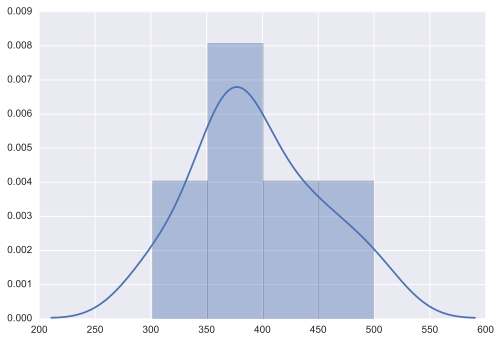

In [37]:
sns.distplot(scores)

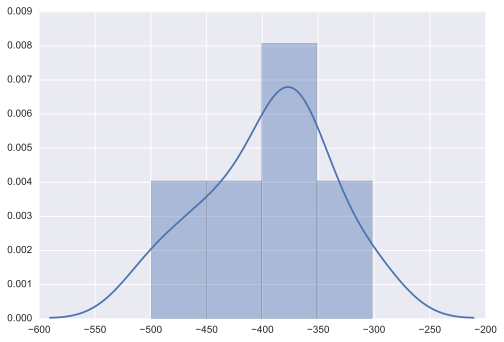

In [41]:
from sklearn.cross_validation import cross_val_score
sns.distplot(cross_val_score(model, X, Y, "mean_squared_error",cv))

In [42]:
cross_val_score?

In [43]:
cross_val_score(model, X, Y, "mean_squared_error",cv)

array([-301.58271911, -341.91498985, -410.58098438, -499.68109613,
       -461.00979825, -384.106544  , -434.90159273, -377.65506997,
       -366.60959935, -371.14031438])